<a href="https://colab.research.google.com/github/Prathamesh282001/Email_Classification_SpamOrHam_NLP_Project/blob/main/Email_Classification_(Spam_or_Ham).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="left"><font color =white>1. Importing Important libraries</font></h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

import warnings
warnings.filterwarnings("ignore")

<h2 align="left"><font color =white> 2. Importing data</font></h2>

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

df = df.rename(columns={"v1":"Label","v2":"Mail"})

df.head(10)

,Label,Mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


<h2 align="left"><font color =white>3. Exploratory Data Analysis</font></h2>

In [4]:
df.shape

(5572, 2)

<Axes: xlabel='Label', ylabel='count'>

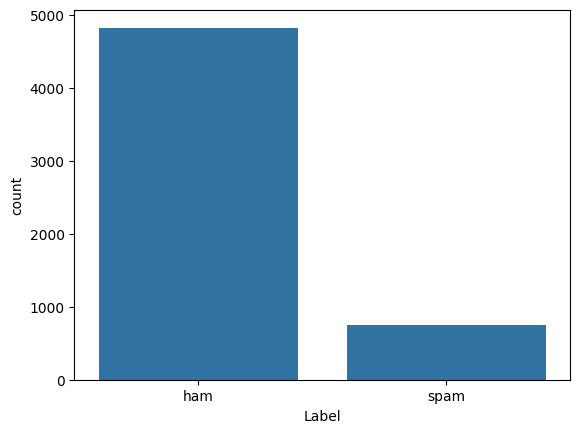

In [5]:
import seaborn as sns
sns.countplot(x="Label",data=df)

<Axes: >

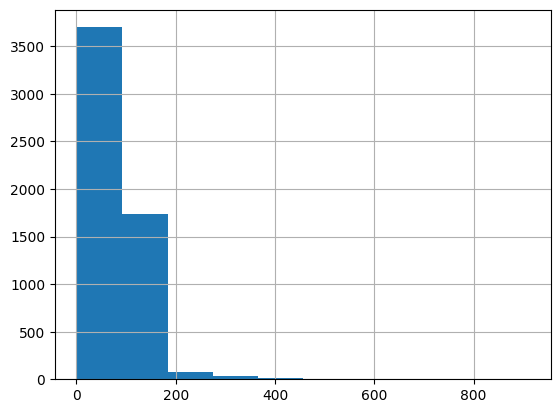

In [6]:
df["length"] = df["Mail"].apply(len)
df.length.hist()

In [7]:
df.loc[:,'Label'] = df.Label.map({'ham':0, 'spam':1})

In [8]:
df.head()

,Label,Mail,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
spam = df[df['Label']==1]
ham = df[df['Label']==0]

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
def plot_ngrams(text):
  vec = CountVectorizer(ngram_range=(3,3),stop_words="english").fit(text)
  bag_of_words = vec.transform(text)
  sum_words = bag_of_words.sum(axis=0)
  words_freq = [(word,sum_words[0,idx]) for word,idx in vec.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
  top_n_words = words_freq[:20]
  ngram = pd.DataFrame(top_n_words, columns = ['Words' , 'Frequency'])

  plt.figure(figsize=(20,10))
  plt.xticks(rotation = 90)
  sns.barplot(x = ngram["Words"], y = ngram["Frequency"])
  plt.xlabel("Top Words used")
  return plt.show()

<h4><font color=white>Spam N-Grams

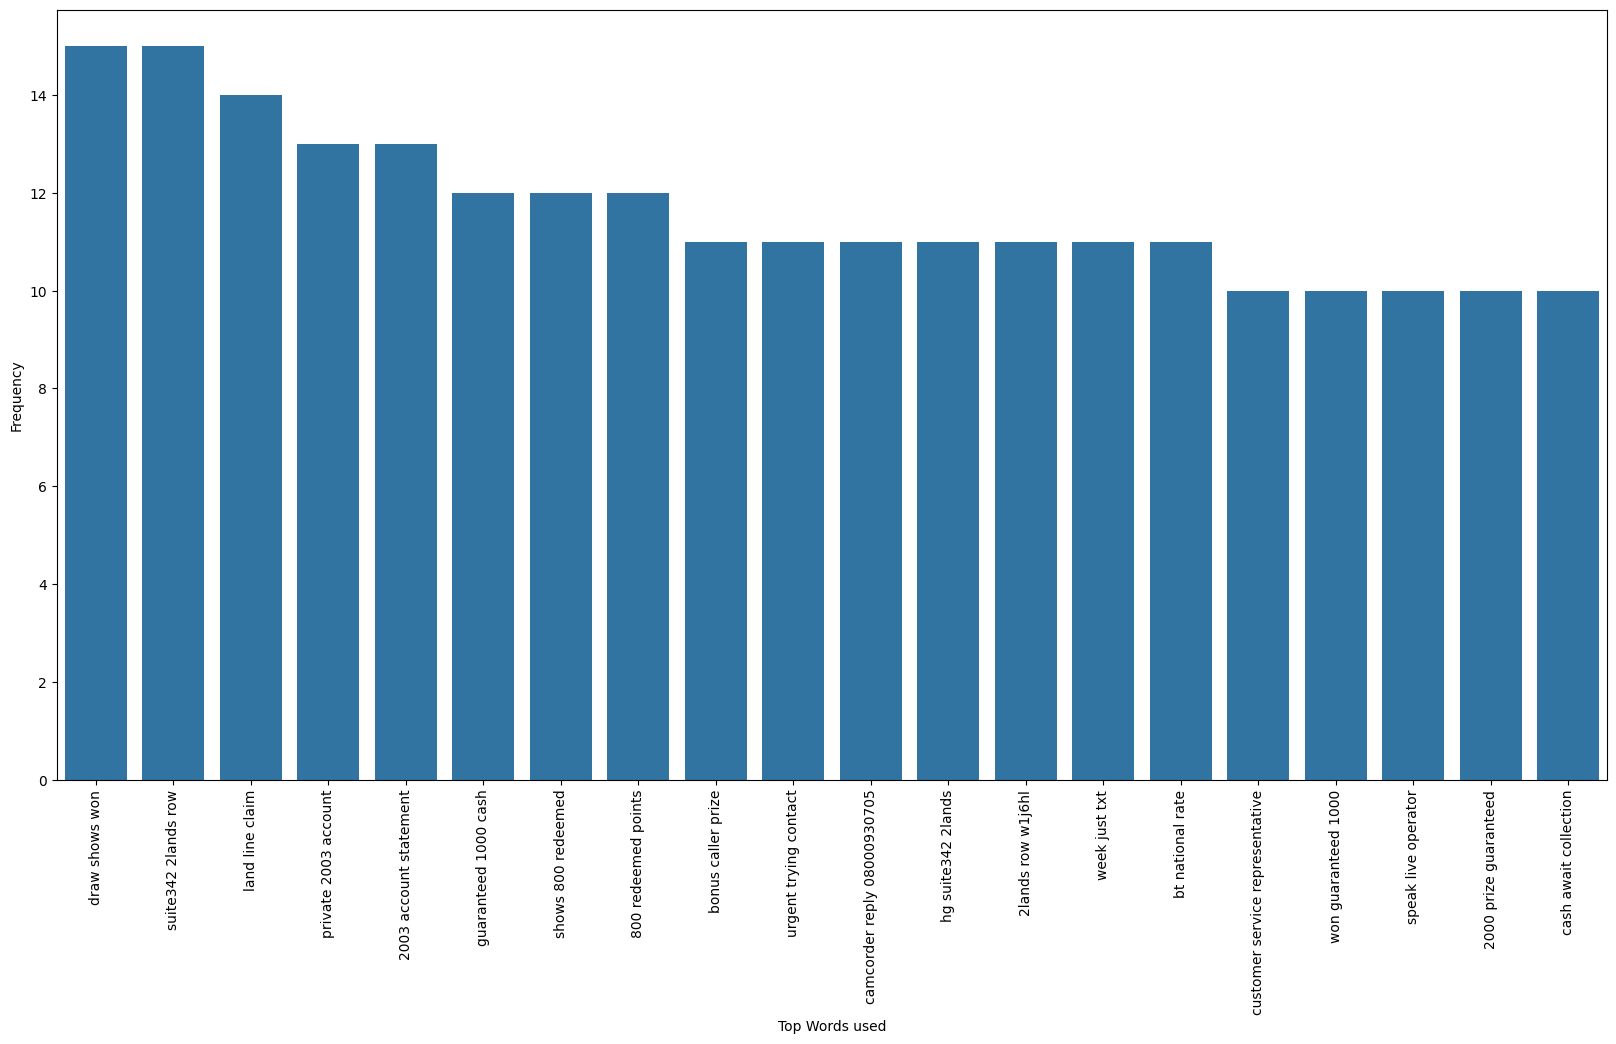

In [47]:
plot_ngrams(spam.Mail)

<h4><font color=white>Ham N-Grams

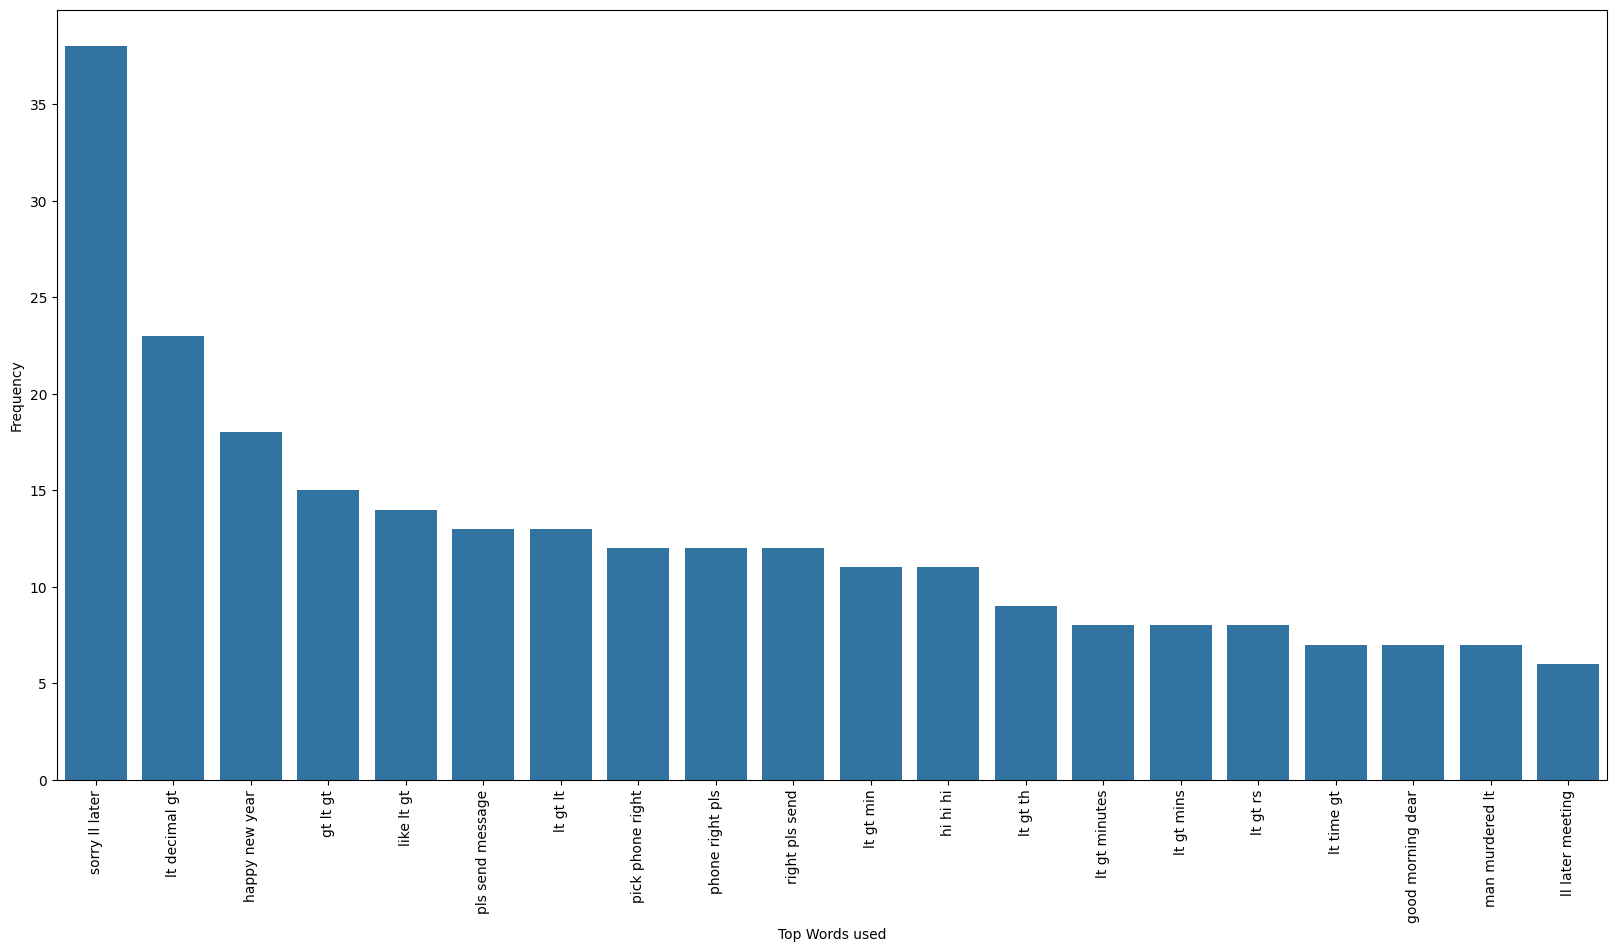

In [36]:
plot_ngrams(ham.Mail)

<h3 align="left"><font color =white>WordCloud</font></h3>

In [37]:
from wordcloud import WordCloud, STOPWORDS

def wordcloud_generation(data):
    words = " ".join(data["Mail"])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                         max_words=1500,
                         max_font_size=350,
                         random_state=42,
                         width=2000,
                         height=800,
                         colormap='tab20c',
                         repeat=False,
                         include_numbers=False,
                         collocations=True).generate(words)

    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud,interpolation="nearest")
    plt.axis("off")
    plt.show()

<h4><font color=white>Spam WordCloud</font></h4>

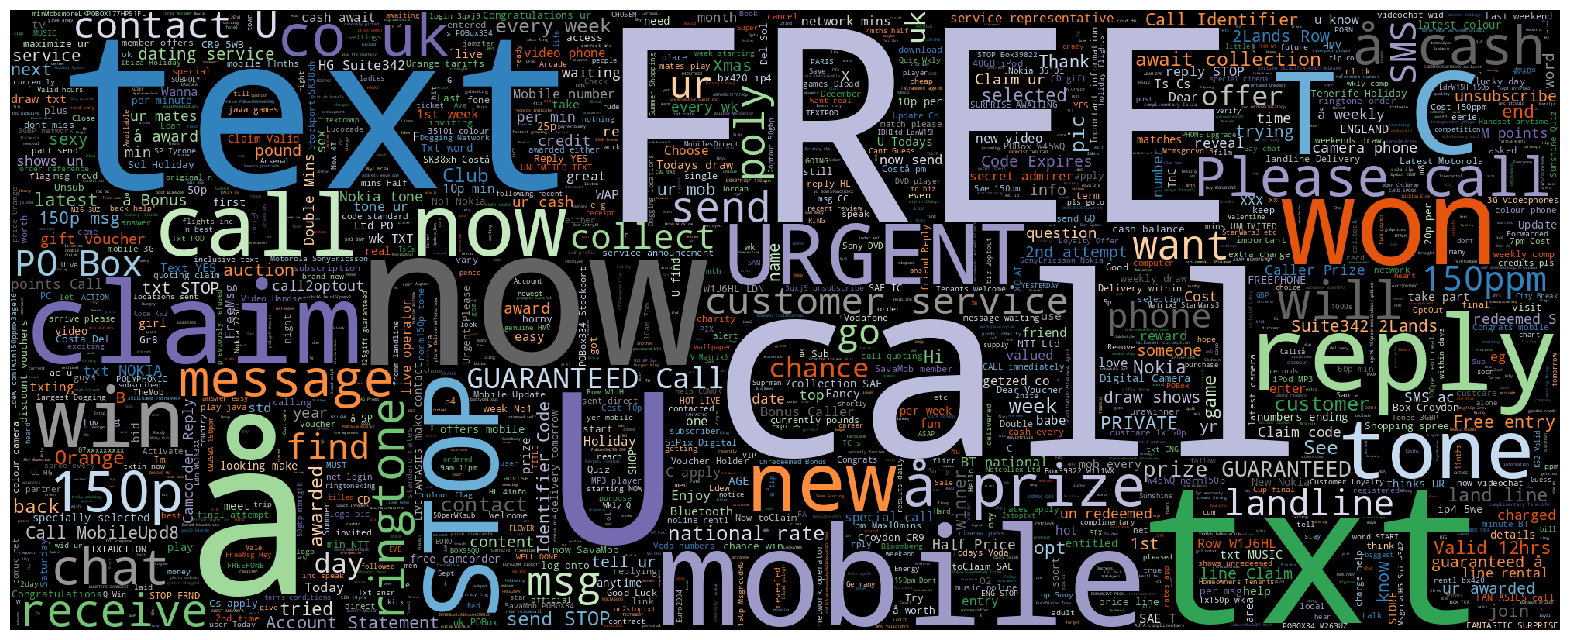

In [38]:
wordcloud_generation(spam)

<h4><font color=white>Ham WordCloud</h4>

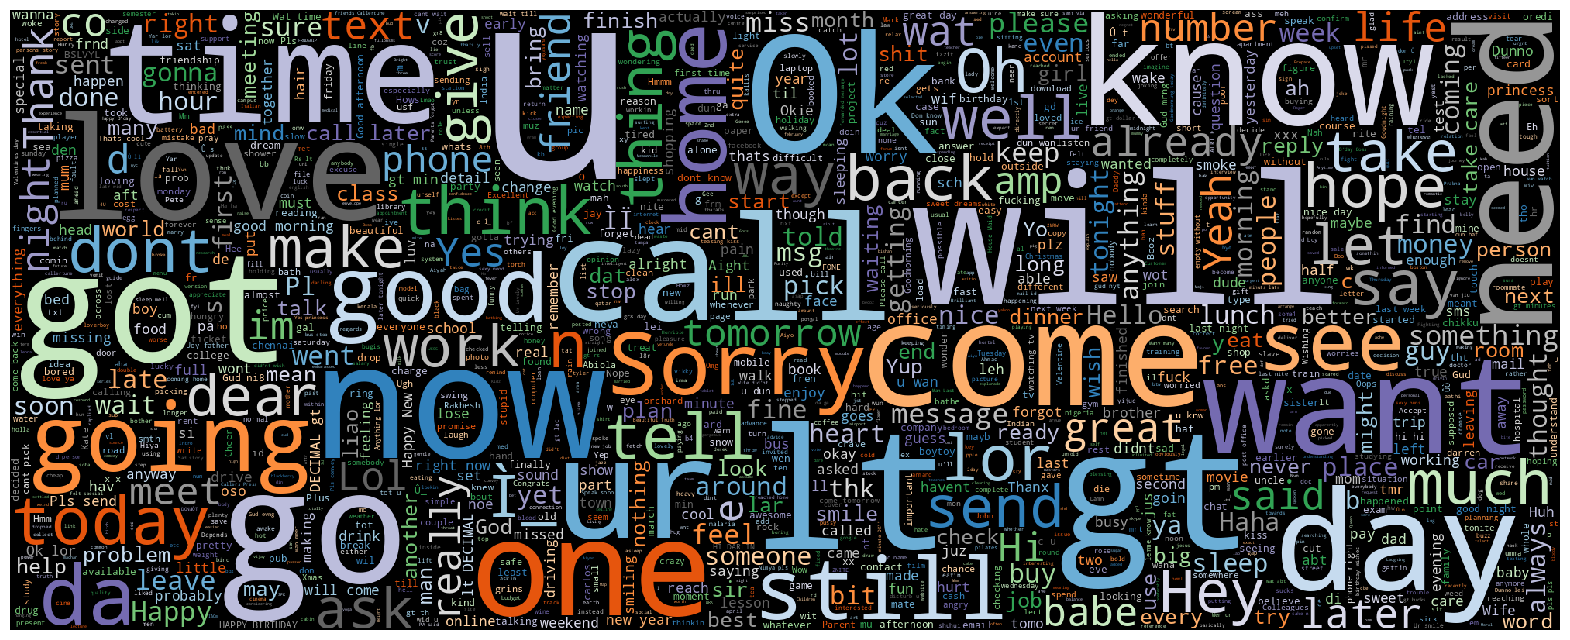

In [39]:
wordcloud_generation(ham)

<h2><font color=white>4. Model Building & Evaluation

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vector = CountVectorizer()
text = vector.fit_transform(df["Mail"])

x_train, x_test, y_train, y_test = train_test_split(text, df["Label"], test_size=0.3,
                                                   random_state=42)


In [13]:
print("x_train : " , x_train.shape)
print("x_test : " , x_test.shape)
print("y_train : " , y_train.shape)
print("y_test : " , y_test.shape)

x_train :  (3900, 8672)
x_test :  (1672, 8672)
y_train :  (3900,)
y_test :  (1672,)


In [17]:
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, roc_auc_score

In [19]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train,y_train)
y_pred = xgb_model.predict(x_test)

print("XGBOOST")
print("-------------------------------------------")
print()
print("Classification Report")
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

XGBOOST
-------------------------------------------

Classification Report
-------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.97      0.84      0.90       219

    accuracy                           0.98      1672
   macro avg       0.97      0.92      0.94      1672
weighted avg       0.98      0.98      0.98      1672



In [20]:
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=100,
                      activation="relu",
                      alpha=0.001,
                      batch_size="auto",
                      early_stopping=False,
                      verbose=False,
                      learning_rate="adaptive")
mlp_model.fit(x_train,y_train)

y_pred = mlp_model.predict(x_test)

print("MLPClassifier")
print("-------------------------------------------")
print()
print("Classification Report")
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

MLPClassifier
-------------------------------------------

Classification Report
-------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       1.00      0.85      0.92       219

    accuracy                           0.98      1672
   macro avg       0.99      0.93      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [21]:
mb_model = MultinomialNB()
mb_model.fit(x_train,y_train)
y_pred = mb_model.predict(x_test)

print("Multinomial Naive Bayes")
print("-------------------------------------------")
print()
print("Classification Report")
print("-------------------------------------------")
print(classification_report(y_test,y_pred))

Multinomial Naive Bayes
-------------------------------------------

Classification Report
-------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.92      0.92      0.92       219

    accuracy                           0.98      1672
   macro avg       0.95      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672



<h4><font color=white>ROC Curve

Text(0, 0.5, 'True Positive Rate')

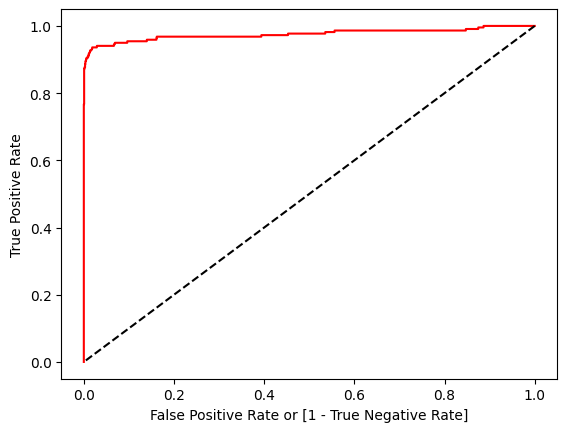

In [23]:
fpr,tpr,thresholds = roc_curve(y_test,mb_model.predict_proba (x_test)[:,1])
#auc1 = roc_auc_score(Y,y_pred)
auc = roc_auc_score(y_test,mb_model.predict_proba (x_test)[:,1])
plt.plot(fpr,tpr,color="red")
plt.plot([1,0],[1,0],"k--")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [24]:
print("Area under curve :",auc)

Area under curve : 0.9753352377540405


<h3><font color=white>Multinomial Naive Bayes model is working well with accuracy of 98%.

<h1><font color=white>END!